In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import json # library to handle JSON files


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')
#!conda install -c conda-forge geopy --yes
#from geopy.geocoders import Nominatim

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
#from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import time

Folium installed
Libraries imported.


<h5>Web scrapping the Wikipedia page on the list of Kolkata suburban Train Station </h5>

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Kolkata_Suburban_Railway_stations' 

In [3]:
#Get the Requested page and convert it to text
data  = requests.get(url).text 

In [4]:
#Using Pandas bs4 flavor to get the list of all dataframes in the requested website
dataframe_list = pd.read_html(url, flavor='bs4')
len(dataframe_list)

2

In [5]:
dataframe_list[1]

#                Station Name                                 \
       #                     English                        Bengali   
0      1                       Abada                          আবাদা   
1      2                Adisaptagram                   আদিসপ্তগ্রাম   
2      3                    Agarpara                       আগরপাড়া   
3      4                    Agradwip                      অগ্রদ্বীপ   
4      5                     Akaipur                        আকাইপুর   
5      6                        Akra                          আকড়া   
6      7                      Amarun                         আমারুন   
7      8                Ambika Kalna                  অম্বিকা কালনা   
8      9                        Amta                           আমতা   
9     10                       Andul                         আন্দুল   
10    11                    Arambagh                        আরামবাগ   
11    12                   Aranghata                       আড়ংঘাটা   
12    13             Ashoknagar Road                    অশোকনগর রোড   
13    14                    Badkulla                      বাদকুল্লা   
14    15                    Bagbazar                       বাগবাজার   
15    16                  Baghajatin                       বাঘাযতীন   
16    17                  Baghnapara                     বাঘনাপাড়া   
17    18                      Bagila                         বাগিলা   
18    19                      Bagnan                         বাগনান   
19    20                      Bagula                          বগুলা   
20    21                      Baharu                           বহরু   
21    22                 Bahirkhanda                      বাহিরখন্ড   
22    23             Bahira Kalibari                বহিরা কালীবাড়ি   
23    24            Bahirgachhi Halt                  বহিরগাছি হল্ট   
24    25                   Bahirpuya                     বাহিরপুয়া   
25    26                  Baidyabati                      বৈদ্যবাটি   
26    27                     Bainchi                          বৈঁচি   
27    28                 Bainchigram                     বৈঁচিগ্রাম   
28    29                    Balagarh                         বলাগড়   
29    30                 Balarambati                      বলরামবাটি   
30    31                     Balgona                          বলগনা   
31    32                    Balichak                         বালিচক   
32    33                       Bally                           বালি   
33    34                  Bally Ghat                        বালিঘাট   
34    35                  Bally Halt                       বালিহল্ট   
35    36         Ballygunge Junction                  বালিগঞ্জ জংশন   
36    37                 Bamangachhi                       বামনগাছি   
37    38                      Bandar                          বন্দর   
38    39             Bandel Junction                 ব্যাণ্ডেল জংশন   
39    40            Bangaon Junction                    বনগাঁও জংশন   
40    41                 Bankimnagar                      বঙ্কিমনগর   
41    42               Bankranayabaz                 বাঁকড়ানয়াবাজ   
42    43                      Banpur                         বানপুর   
43    44                 Bansh Baria                   বাঁশবেড়িয়া   
44    45              Baranagar Road                    বরাহনগর রোড   
45    46            Barasat Junction                   বারাসাত জংশন   
46    47                       Barda                           বরদা   
47    48         Barddhaman Junction                   বর্ধমান জংশন   
48    49                   Bargachia                     বড়গাছিয়া   
49    50                 Burra Bazar                       বড়বাজার   
50    51                 Barrackpore                     ব্যারাকপুর   
51    52                   Baruipara                     বারুইপাড়া   
52    53           Baruipur Junction                  বারুইপুর জংশন   
53    54                    Basirhat                        বসিরহাট   
54    55                  Basul

In [6]:
dataframe_list[1].columns

MultiIndex([(                 '#',                  '#'),
            (      'Station Name',            'English'),
            (      'Station Name',            'Bengali'),
            (      'Station Code',       'Station Code'),
            (              'Line',               'Line'),
            (       'Year opened',        'Year opened'),
            (        'Connection',         'Connection'),
            ('Fast train stop[a]', 'Fast train stop[a]'),
            (  'Long Distance[b]',   'Long Distance[b]'),
            (             'Notes',              'Notes'),
            (              'Refs',               'Refs')],
           )

In [7]:
#Change the Name of the Columns
station_line_df=dataframe_list[1][[(      'Station Name',            'English'),
                  (              'Line',               'Line'),]]
station_line_df.columns=['StationName','Line']
station_line_df

,StationName,Line
0,Abada,South Eastern Line
1,Adisaptagram,Eastern Line
2,Agarpara,Eastern Line
3,Agradwip,Eastern Line
4,Akaipur,Eastern Line
5,Akra,South Lines
6,Amarun,Eastern Line
7,Ambika Kalna,Eastern Line
8,Amta,South Eastern Line
9,Andul,South Eastern LineChord link Line


In [8]:
#keeping a copy of the data Frame
station_line_df_copy=station_line_df

In [39]:
#station_line_df=station_line_df_copy

In [9]:
station_line_df.columns

Index(['StationName', 'Line'], dtype='object')

<h7> Some entries on the Table has two Lines in the Line Column, which simply denote that the Station falls under Two Train Lines. For simlicity we will keep only on e Line inthe Line Column</h7>

In [10]:
station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Circular Line' if ('Circular Line' in x) else x)
station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Circular Line' if ('Circular line' in x) else x)
station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Chord link Line' if ('Chord link Line' in x) else x)
station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Eastern Line' if ('Eastern Line' in x) else x)
station_line_df['Line']
#kolkataUrbanStations=station_line_df[station_line_df['Line'].apply(lambda x: True if ('Chord link Line' in x or 'Circular Line' in x) else False)]

<ipython-input-10-221a8b6d18e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Circular Line' if ('Circular Line' in x) else x)
<ipython-input-10-221a8b6d18e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_line_df['Line']=station_line_df['Line'].apply(lambda x: 'Circular Line' if ('Circular line' in x) else x)
<ipython-input-10-221a8b6d18e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

0         Eastern Line
1         Eastern Line
2         Eastern Line
3         Eastern Line
4         Eastern Line
5          South Lines
6         Eastern Line
7         Eastern Line
8         Eastern Line
9      Chord link Line
10        Eastern Line
11        Eastern Line
12        Eastern Line
13        Eastern Line
14       Circular Line
15         South Lines
16        Eastern Line
17        Eastern Line
18        Eastern Line
19        Eastern Line
20         South Lines
21        Eastern Line
22        Eastern Line
23        Eastern Line
24         South Lines
25        Eastern Line
26        Eastern Line
27        Eastern Line
28        Eastern Line
29        Eastern Line
30        Eastern Line
31        Eastern Line
32        Eastern Line
33     Chord link Line
34     Chord link Line
35       Circular Line
36        Eastern Line
37        Eastern Line
38        Eastern Line
39        Eastern Line
40        Eastern Line
41     Chord link Line
42        Eastern Line
43        E

In [11]:
len(station_line_df['Line'].unique())

4

In [12]:
station_line_df.head()

,StationName,Line
0,Abada,Eastern Line
1,Adisaptagram,Eastern Line
2,Agarpara,Eastern Line
3,Agradwip,Eastern Line
4,Akaipur,Eastern Line


<h5> Use Geopy to find latitude and Longitude of each Stations</h5>

In [13]:
#Function to Find Coordinates of each Station using Geopy
def get_coordinates(AreaName):
    print(AreaName)
    time.sleep(4)
    geolocator = Nominatim(user_agent="foursquare_agent")
    g = geolocator.geocode('{} Station, West Bengal'.format(AreaName))
    try:
        latitude = g.latitude
        longitude = g.longitude
        print(AreaName,latitude,longitude)
    except:
        return None
    return latitude,longitude

In [14]:
#Calling the above Function
station_line_df['lat_lng']=station_line_df['StationName'].apply(get_coordinates)
station_line_df['lat_lng']

Abada
Abada 22.5478712 88.1995212
Adisaptagram
Agarpara
Agarpara 22.6828782 88.3853645
Agradwip
Agradwip 23.5959174 88.2391804
Akaipur
Akra
Akra 22.5147366 88.2492787
Amarun
Amarun 23.36424245 87.94389228369519
Ambika Kalna
Ambika Kalna 23.2125979 88.3537957
Amta
Amta 22.613917999999998 88.01665358978886
Andul
Andul 22.5825852 88.23562603520615
Arambagh
Arambagh 22.876448 87.790956
Aranghata
Aranghata 23.245383 88.6061364
Ashoknagar Road
Ashoknagar Road 22.8267554 88.6286227
Badkulla
Badkulla 23.3055075 88.5262084
Bagbazar
Bagbazar 22.8635723 88.3655944
Baghajatin
Baghajatin 22.4805175 88.3887598
Baghnapara
Baghnapara 23.2421439 88.3289301
Bagila
Bagila 23.1583278 88.1260036
Bagnan
Bagnan 22.4930602 87.95076913504252
Bagula
Bagula 23.3349477 88.6459051
Baharu
Baharu 22.2049367 88.4442661
Bahirkhanda
Bahira Kalibari
Bahira Kalibari 22.6859708 88.5648945
Bahirgachhi Halt
Bahirpuya
Baidyabati
Baidyabati 22.7949104 88.3317725
Bainchi
Bainchi 23.1196627 88.1967576
Bainchigram
Bainchigram 23

Kona 22.5754021 88.3017734
Konnagar
Konnagar 22.69972 88.3519784
Krishna Mohan
Krishna Mohan 26.8888557 75.7702244
Krishnanagar City Junction
Krishnanagar City Junction 23.3886668 88.4935346
Kulgachia
Kulgachia 22.472091 88.0205997
Kulpi
Kulpi 22.046120600000002 88.24879507362124
Kuntighat
Kuntighat 23.0171023 88.4135873
Lebutala
Lebutala 22.6666962 88.63994
Lake Gardens
Lake Gardens 22.5080547 88.3533289
Lakshmikantapur
Lakshmikantapur 22.1101526 88.3222651
Lakshmipur
Lakshmipur 22.9629917 90.809662
Liluah
Liluah 22.6207446 88.3392327
Loknath
Loknath 25.6409925 88.3304803
Machhalandapur
Madanpur
Madanpur 23.6903167 90.5465658
Madhabpur
Madhabpur 22.1203302 88.349087
Madhusudanpur
Madhyamgram
Madhyamgram 22.6947839 88.4530183
Madhyampur
Madhyampur 22.6203636 88.8966647
Madpur
Madpur 22.3692521 87.4430916
Mogra
Mogra 22.9936302 88.3848561
Magra Hat
Magra Hat 22.2403975 88.3723482
Mahendralalnagar
Mahendralalnagar 22.6435085 88.0914836
Mahishadal
Mahishadal 22.1888242 87.9833125
Majerhat

<ipython-input-14-3ae116262a37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_line_df['lat_lng']=station_line_df['StationName'].apply(get_coordinates)


0                      (22.5478712, 88.1995212)
1                                          None
2                      (22.6828782, 88.3853645)
3                      (23.5959174, 88.2391804)
4                                          None
5                      (22.5147366, 88.2492787)
6              (23.36424245, 87.94389228369519)
7                      (23.2125979, 88.3537957)
8       (22.613917999999998, 88.01665358978886)
9               (22.5825852, 88.23562603520615)
10                       (22.876448, 87.790956)
11                      (23.245383, 88.6061364)
12                     (22.8267554, 88.6286227)
13                     (23.3055075, 88.5262084)
14                     (22.8635723, 88.3655944)
15                     (22.4805175, 88.3887598)
16                     (23.2421439, 88.3289301)
17                     (23.1583278, 88.1260036)
18              (22.4930602, 87.95076913504252)
19                     (23.3349477, 88.6459051)
20                     (22.2049367, 88.4

In [15]:
#Finding number of entries for which latitude longitude data could not be fetched
station_line_df[station_line_df['lat_lng'].isnull()].shape[0] 

62

In [16]:
#dropping all rows with no lat-long data
station_line_df=station_line_df[~pd.isnull(station_line_df['lat_lng'])]

In [17]:
station_line_df[station_line_df['lat_lng'].isnull()].shape[0]

0

In [22]:
#Separating Latitude and Longitude Columns
station_line_df['Latitude']=station_line_df['lat_lng'].apply(lambda x:x[0] )
station_line_df['Longitude']=station_line_df['lat_lng'].apply(lambda x:x[1] )

<ipython-input-22-591123c5b79d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_line_df['Latitude']=station_line_df['lat_lng'].apply(lambda x:x[0] )
<ipython-input-22-591123c5b79d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_line_df['Longitude']=station_line_df['lat_lng'].apply(lambda x:x[1] )


In [4]:
#Finding the Cooridates of Kolkata city
address = 'Kolkata, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

22.5726723 88.3638815


In [24]:
#Plot all Sations on the map using Folium
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#ensurind different color for each Line 
colors_array = cm.rainbow(np.linspace(0, 1, len(station_line_df['Line'].unique())))
rainbow = [colors.rgb2hex(i) for i in colors_array]
lineList=station_line_df['Line'].unique().tolist()


# add markers to the map
markers_colors = []
for name,line,lat,lng in zip(station_line_df['StationName'], station_line_df['Line'], station_line_df['Latitude'], station_line_df['Longitude']):
    label = folium.Popup(str(name) + ', Line:  ' + str(line), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[lineList.index(line)],
        fill=True,
        fill_color=rainbow[lineList.index(line)],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters

<h7>As the plot reveals the Wiki page consist of all stations in the state of West Bengal rather than only the list of train stations inside Kolkata. Therefore we needed to find the stations which are within the vicinity of Kolkata. So we selected four Train Stations at the extreme boundaries in four directions of the Kolkata city from the map and then we selected all the stations that falls within that boundary in the following manner:
</h7>
<h6>
#south=Sonarpur Junction (Latitude should be >= Latitude of Sonarpur Junction)
    
    
#north=New Barrackpore (Latitude should be <= Latitude of New Barrackpore) 
                                                     

#west=Santragachi Junction (Longitude should be >= Longitude of Santragachi Junction) 

    
#east=Barasat Junction (Longitude should be <= Longitude of Barasat Junction) 
                                                       </h6>
                                                       

In [25]:
#setting the Extremes of Latitude and Longitude Values
southMostLatitude=float(station_line_df[station_line_df['StationName']=='Sonarpur Junction']['Latitude'])
northMostLatitude=float(station_line_df[station_line_df['StationName']=='New Barrackpore']['Latitude'])
westMostLongitude=float(station_line_df[station_line_df['StationName']=='Santragachi Junction']['Longitude'])
eastMostLongitude=float(station_line_df[station_line_df['StationName']=='Barasat Junction']['Longitude'])

In [26]:
#Keeping only the Stations within the boudary decided by us above
temp1=station_line_df[station_line_df['Latitude'].astype(float)>=southMostLatitude]
temp2=temp1[temp1['Latitude'].astype(float)<=northMostLatitude]
temp3=temp2[temp2['Longitude'].astype(float)>=westMostLongitude]
df=temp3[temp3['Longitude'].astype(float)<=eastMostLongitude]
df.reset_index(inplace=True)

In [27]:
df.shape

(65, 6)

In [28]:
#saving the File for future use
df.to_csv("kolSubUrbTrainStationNames.csv",index=False)


In [2]:
#Reading the file saved earlier
df=pd.read_csv('kolSubUrbTrainStationNames.csv')
station_line_df=df

In [5]:
#Plotting the stations within the City of Kolkata and its vicinity
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)


colors_array = cm.rainbow(np.linspace(0, 1, len(station_line_df['Line'].unique())))
rainbow = [colors.rgb2hex(i) for i in colors_array]
lineList=station_line_df['Line'].unique().tolist()


# add markers to the map
markers_colors = []
for name,line,lat,lng in zip(station_line_df['StationName'], station_line_df['Line'], station_line_df['Latitude'], station_line_df['Longitude']):
    label = folium.Popup(str(name) + ', Line:  ' + str(line), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[lineList.index(line)],
        fill=True,
        fill_color=rainbow[lineList.index(line)],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters

In [6]:
#df=pd.read_csv("kolSubUrbTrainStationNames.csv")
df.drop(columns=['index'], inplace=True)
df.head()

,StationName,Line,lat_lng,Latitude,Longitude
0,Agarpara,Eastern Line,"(22.6828782, 88.3853645)",22.682878,88.385365
1,Baghajatin,South Lines,"(22.4805175, 88.3887598)",22.480517,88.388760
2,Bally,Eastern Line,"(22.64259075, 88.31841856805198)",22.642591,88.318419
3,Bally Ghat,Chord link Line,"(22.652442, 88.3479045)",22.652442,88.347904
4,Bally Halt,Chord link Line,"(22.6523408, 88.3386361)",22.652341,88.338636


In [7]:
#dropping the lat_lng column as it is redundant and also Renaming the columns
df.drop(columns=['lat_lng'],inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns=['Area','Line','Latitude','Longitude']
df.head()

,Area,Line,Latitude,Longitude
0,Agarpara,Eastern Line,22.682878,88.385365
1,Baghajatin,South Lines,22.480517,88.388760
2,Bally,Eastern Line,22.642591,88.318419
3,Bally Ghat,Chord link Line,22.652442,88.347904
4,Bally Halt,Chord link Line,22.652341,88.338636


Now we prepare the Credentials to access Foursquare API

In [8]:
CLIENT_ID = 'EDVNUDPMPCTF4YZYEHJ5HF0UQEX5LLKI2RZ5NT21ELCZ5DON' # your Foursquare ID
CLIENT_SECRET = 'HW5DJH3G5BSDXF1JAMDLI5SIQZZIFDIMTPOBQNOACQ3CWHLT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EDVNUDPMPCTF4YZYEHJ5HF0UQEX5LLKI2RZ5NT21ELCZ5DON
CLIENT_SECRET:HW5DJH3G5BSDXF1JAMDLI5SIQZZIFDIMTPOBQNOACQ3CWHLT


In [9]:
#definning a function to extract data from JSON to DataFrame for all Postal Code
def getNearbyVenues(addr, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for addr, lat, lng in zip(addr, latitudes, longitudes):
        print(addr)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            addr,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['address1',
                  'Postal Latitude', 
                  'Postal Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
kolkata_venues = getNearbyVenues(addr=df['Area'],
                                latitudes=df['Latitude'],
                                longitudes=df['Longitude'],
                                radius = 1500)
                                  

Agarpara
Baghajatin
Bally
Bally Ghat
Bally Halt
Ballygunge Junction
Bandar
Baranagar Road
Barasat Junction
Barrackpore
Belanagar
Belgharia
Belur
Belur Math
Benoy Badal Dinesh Bagh
Bidhannagar Road
Biman Bandar
Birati
Brace Bridge
Dakshineswar
Dasnagar
Dhakuria
Dum Dum Cantonment
Dum Dum Junction
Eden Gardens
Garia
Howrah Junction
Hridaypur
Jadavpur
Jessore Road
Khardaha
Kolkata Chitpur
Kona
Konnagar
Lake Gardens
Liluah
Madhyamgram
Narendrapur
Netra
New Alipore
New Barrackpore
New Garia
Padmapukur
Park Circus
Patipukur
Prinsep Ghat
Ramrajatala
Remount Road
Rishra
Santragachi Junction
Sealdah
Shalimar
Shrirampur
Sir Gurudas Banerjee Halt
Sodepur
Sonarpur Junction
Tala
Tikiapara
Titagarh
Tollygunge
Uttarpara
Deshapran
Hind Motor
Baltikuri
Bhattanagar


In [11]:
kolkata_venues.shape #number of values fetched

(882, 7)

In [12]:
#saving the dataframe for future use
kolkata_venues.to_csv("kolkata_venues.csv",index=False)

In [13]:
#kolkata_venues= pd.read_csv("kolkata_venues.csv")
kolkata_venues.head()

,address1,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agarpara,22.682878,88.385365,Agarpara Railway Station,22.682886,88.385364,Train Station
1,Agarpara,22.682878,88.385365,Axis Bank ATM,22.676238,88.389057,ATM
2,Agarpara,22.682878,88.385365,Sleepwell,22.680460,88.374260,Mattress Store
3,Agarpara,22.682878,88.385365,Shamvu da's tea shop,22.694959,88.379661,Bakery
4,Baghajatin,22.480517,88.388760,Inox,22.483197,88.390803,Multiplex


In [63]:
#checking the number of venues fetched by Foursquare for each Station
kolkata_venues.groupby('address1').count()

,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
address1,,,,,,
Agarpara,4,4,4,4,4,4
Baghajatin,5,5,5,5,5,5
Bally,1,1,1,1,1,1
Bally Ghat,6,6,6,6,6,6
Bally Halt,6,6,6,6,6,6
Ballygunge Junction,41,41,41,41,41,41
Baltikuri,4,4,4,4,4,4
Bandar,18,18,18,18,18,18
Baranagar Road,6,6,6,6,6,6


Total of 882 venues are fetched, with no one area having 100 entries, which is the maximum limit set by us on the number of venues to be fetched per location. This signifies that the result is all encompassing i.e., the result contains all possible venues within 1.5Km radius from each station that are present in Foursquare dataset.

In [14]:
kolkata_venues_copy=kolkata_venues

<h5>Assumptions:</h5>
Now in order to pin point on areas where the service need to be targeted, we will make some assumption:


1.	We will assume that Dabbawala service demand would be substantial at areas with high concentration of Office places, where people would need homemade food during their lunch time. These areas are places where due to high demand for food service, concentration of restaurants is also very high. Generally office areas are highly concentrated in commercial places which would have high concentration of Banks, ATMs and other Financial services. Therefore our target location would be areas with high concentration of Offices, Restaurants, Banks, ATM, and Other Financial services.


2.	Similarly we will assume that areas from where house wives could be recruited for cooking are residential areas. And residential area are places where concentration of residential apartments, parks, departmental stores(grocery stores in India), sweet shops (specially in case of city of Kolkata) are high.

<h5>First we will see for locations to target for the service delivery. Therefore based on the above mentioned Assumption 1 we will filter out all venue category which have ‘Office’, ‘Restaurant’, ‘Bank’, ‘ATM’ and ‘Finance’ in it.
</h5>

<h7>[Since Foursquare data set is still growing in city like Kolkata and as of now very few data on ‘Office’, ’Financial service’ and ‘ATM’ is available in most areas, we will limit our search only to ‘Restaurants’ and ‘Banks’. ]
</h7>

In [15]:
kolkata_venues=kolkata_venues_copy
search_category1='Restaurant'
search_category2='Bank'
kolkata_venues_ServiceTarget=kolkata_venues[kolkata_venues['Venue Category'].apply(lambda x: True if (search_category1 in x or search_category2 in x) else False)]
kolkata_venues_ServiceTarget.head()

,address1,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
23,Ballygunge Junction,22.519162,88.372192,6 Ballygunge Place,22.527712,88.368677,Bengali Restaurant
25,Ballygunge Junction,22.519162,88.372192,China Whites,22.521960,88.365482,Chinese Restaurant
28,Ballygunge Junction,22.519162,88.372192,Chowman,22.526977,88.368509,Chinese Restaurant
29,Ballygunge Junction,22.519162,88.372192,Aminia,22.516571,88.366739,Mughlai Restaurant
31,Ballygunge Junction,22.519162,88.372192,Cream Centre,22.527096,88.368444,Vegetarian / Vegan Restaurant


In [16]:
kolkata_venues_ServiceTarget.groupby('address1').count()['Venue'].sort_values(ascending=False)[0:5]

address1
Benoy Badal Dinesh Bagh    23
Bidhannagar Road           19
Padmapukur                 16
Lake Gardens               16
Eden Gardens               13
Name: Venue, dtype: int64

In [101]:
#kolkata_venues=kolkata_venues_copy

In [17]:
# create map showing the Categories of Assumption 1 as red dots 
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to the map
markers_colors = []
for lat, lon, poi in zip(df['Latitude'], df['Longitude'], df['Area']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1).add_to(map_clusters)

    
for lat, lon, poi in zip(kolkata_venues_ServiceTarget['Venue Latitude'], kolkata_venues_ServiceTarget['Venue Longitude'], kolkata_venues_ServiceTarget['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2).add_to(map_clusters)
       

map_clusters

In the map above the Blue circles are the Stations and their vicinity while the red dots are Restaurants and Banks. 

As clear from the map, the concentration of these categories mentioned in assumption 1 are much higher near some stations as compared to others. 


<h6>Following are the top 10 stations around which the demand for the service would probably be highest as these are the places where demand for food service is high as the concentration of restaurants is high and also these are the office area as the categories as mentioned in the assumption one are high here.</h6>

In [53]:
freqOfCategory=kolkata_venues_ServiceTarget.groupby(["address1"])['Venue Category'].count()
CategoryFreq=pd.DataFrame(columns=['Address','Freq'])
CategoryFreq['Address']=freqOfCategory.index.tolist()
CategoryFreq['Freq']=freqOfCategory.tolist()
CategoryFreq=CategoryFreq[0:-2]
Sorted_category_target=CategoryFreq.sort_values(by=['Freq'],ascending=False)
Sorted_category_target.head(10)

,Address,Freq
3,Benoy Badal Dinesh Bagh,23
4,Bidhannagar Road,19
21,Padmapukur,16
17,Lake Gardens,16
22,Park Circus,13
12,Eden Gardens,13
0,Ballygunge Junction,12
19,Netra,10
10,Dhakuria,9
9,Deshapran,6


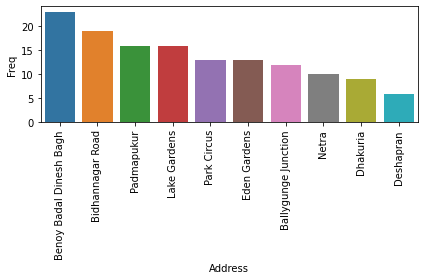

In [54]:
#Ploting the Stations where the demand for the service would be highest on the bar graph
ax = sns.barplot(x="Address", y="Freq", data=Sorted_category_target.head(10))
plt.xticks(rotation=90)
plt.tight_layout()


<h5>Similarly we find areas where the categories as mentioned in Assumption 2 are high. These are the areas which are residential areas and cooks could be recruited from these areas.
</h5>

<h7>
[Since Foursquare data set is still growing in area like city of kolkata and as of now there is a dearth of data on residential apartments, market, departmental stores and grocery stores in most areas, we will limit our search only to ‘Parks’ and ‘sweet shops’ ]</h7>

In [19]:
search_category1='Park'
search_category2='Sweet Shop'
kolkata_venues_Resident=kolkata_venues[kolkata_venues['Venue Category'].apply(lambda x: True if (search_category1 in x or search_category2 in x) else False)]
kolkata_venues_Resident.reset_index(drop=True, inplace=True)
kolkata_venues_Resident

,address1,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ballygunge Junction,22.519162,88.372192,Triangular Park,22.517924,88.358289,Park
1,Ballygunge Junction,22.519162,88.372192,Balaram Mullick & Radharaman Mullick,22.528246,88.366438,Indian Sweet Shop
2,Ballygunge Junction,22.519162,88.372192,Vivekananda Park,22.514596,88.359554,Park
3,Barasat Junction,22.724237,88.484014,Tarakeshwar Mistanna Bhandar,22.724772,88.477584,Indian Sweet Shop
4,Benoy Badal Dinesh Bagh,22.563288,88.345868,K. C. Das,22.565434,88.351667,Indian Sweet Shop
5,Benoy Badal Dinesh Bagh,22.563288,88.345868,Millennium Park,22.572481,88.344517,Park
6,Benoy Badal Dinesh Bagh,22.563288,88.345868,Eden Garden Park,22.564244,88.340743,Park
7,Bidhannagar Road,22.584431,88.405524,Central Park,22.586198,88.417797,Park
8,Bidhannagar Road,22.584431,88.405524,BH Block Park,22.594553,88.414876,Park
9,Dhakuria,22.509408,88.371185,Vivekananda Park,22.514596,88.359554,Park


In [20]:
kolkata_venues_Resident.groupby('address1').count()['Venue'].sort_values(ascending=False)

address1
Padmapukur                   4
Eden Gardens                 3
Benoy Badal Dinesh Bagh      3
Ballygunge Junction          3
Sealdah                      2
Park Circus                  2
Lake Gardens                 2
Bidhannagar Road             2
Sir Gurudas Banerjee Halt    1
Prinsep Ghat                 1
Jadavpur                     1
Howrah Junction              1
Dum Dum Junction             1
Dhakuria                     1
Deshapran                    1
Barasat Junction             1
Name: Venue, dtype: int64

<h6>Following are the top ten stations around which venue categories indicating them to be a residential area (Asuumption 2) are highest in frequency and from where cooks can be recruited.</h6>

In [59]:
freqOfCategory=kolkata_venues_Resident.groupby(["address1"])['Venue Category'].count()
CategoryFreq=pd.DataFrame(columns=['Address','Freq'])
CategoryFreq['Address']=freqOfCategory.index.tolist()
CategoryFreq['Freq']=freqOfCategory.tolist()
CategoryFreq=CategoryFreq[0:-2]
Sorted_category_resident=CategoryFreq.sort_values(by=['Freq'],ascending=False)
Sorted_category_resident.head(10)

,Address,Freq
11,Padmapukur,4
0,Ballygunge Junction,3
2,Benoy Badal Dinesh Bagh,3
7,Eden Gardens,3
3,Bidhannagar Road,2
10,Lake Gardens,2
12,Park Circus,2
1,Barasat Junction,1
4,Deshapran,1
5,Dhakuria,1


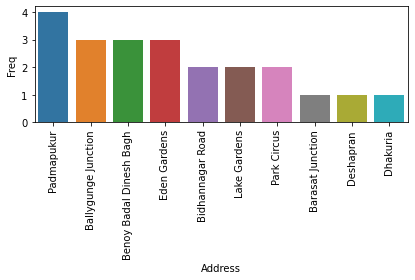

In [60]:
#Ploting the Stations from where the cooks are to be recruited
ax = sns.barplot(x="Address", y="Freq", data=Sorted_category_resident.head(10))
plt.xticks(rotation=90)
plt.tight_layout()

In [21]:
# Showing Categories from assumption 1 and those from Assumption 2 on the map as red dot and green dots respectively
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to the map
markers_colors = []
for lat, lon, poi in zip(df['Latitude'], df['Longitude'], df['Area']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1).add_to(map_clusters)
    
for lat, lon, poi in zip(kolkata_venues_ServiceTarget['Venue Latitude'], kolkata_venues_ServiceTarget['Venue Longitude'], kolkata_venues_ServiceTarget['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2).add_to(map_clusters)
       
for lat, lon, poi in zip(kolkata_venues_Resident['Venue Latitude'], kolkata_venues_Resident['Venue Longitude'], kolkata_venues_Resident['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)
map_clusters

<h5>We see that the location of service target as well as that of residential area is either overlapping or very close to each other, which is very optimal for the business as it would further squeeze the commutation cost.</h5>

In [26]:
kolkata_venues.head()

,address1,Postal Latitude,Postal Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agarpara,22.682878,88.385365,Agarpara Railway Station,22.682886,88.385364,Train Station
1,Agarpara,22.682878,88.385365,Axis Bank ATM,22.676238,88.389057,ATM
2,Agarpara,22.682878,88.385365,Sleepwell,22.680460,88.374260,Mattress Store
3,Agarpara,22.682878,88.385365,Shamvu da's tea shop,22.694959,88.379661,Bakery
4,Baghajatin,22.480517,88.388760,Inox,22.483197,88.390803,Multiplex


In [27]:
# one hot encoding
category_onehot1 = pd.get_dummies(kolkata_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
category_onehot1['Neighborhood'] = kolkata_venues['address1']
indx=category_onehot1.columns.tolist().index('Neighborhood')
# move neighborhood column to the first column
fixed_columns = [category_onehot1.columns[indx]] + list(category_onehot1.columns[:indx-1])+list(category_onehot1.columns[indx+1:])
category_onehot1 = category_onehot1[fixed_columns]

category_onehot1.head()

,Neighborhood,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Field,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Service,Fried Chicken Joint,Frozen Yogurt Shop,Gaming Cafe,Gastropub,Gift Shop,Golf Course,Harbor / Marina,Historic Site,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Men's Store,Metro Station,Military Base,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Nightclub,Optical Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Snack Place,Social Club,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Taxi Stand,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,Agarpara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Agarpara,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agarpara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agarpara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baghajatin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
#Find the number venues with each category are present around each Stations
kolkata_grouped = category_onehot1.groupby('Neighborhood').sum().reset_index()
kolkata_grouped

,Neighborhood,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Field,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Service,Fried Chicken Joint,Frozen Yogurt Shop,Gaming Cafe,Gastropub,Gift Shop,Golf Course,Harbor / Marina,Historic Site,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Men's Store,Metro Station,Military Base,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Nightclub,Optical Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Snack Place,Social Club,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Taxi Stand,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,Agarpara,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Baghajatin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bally,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bally Ghat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,Bally Halt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
5,Ballygunge Junction,0,0,0,0,0,1,1,0,0,0,0,1,0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,7,3,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
6,Baltikuri,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bandar,0,2,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Baranagar Road,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
9,Barasat Junction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
kclusters = 3 #number of cluster decided upon

kolkata_grouped_clustering = kolkata_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kolkata_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
# this function will return the sorted list of ten categories of venues found around a station based on the frequency of that venue category
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    returnVal=[]
    for i in range(num_top_venues):
        if row_categories_sorted[i]!=0:
            returnVal.append(row_categories_sorted.index[i])
        else:
            returnVal.append(np.nan)
            
    
    return returnVal

In [32]:
#creating adata frame showing the top ten venues around each station based of their frequency of occurance
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kolkata_grouped['Neighborhood']

for ind in np.arange(kolkata_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)

    
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Agarpara,ATM,Bakery,Mattress Store,Train Station,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Baghajatin,Multiplex,Bus Station,Department Store,Metro Station,Shopping Mall,NaN,NaN,NaN,NaN,NaN
2,0,Bally,ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Bally Ghat,Train Station,Boat or Ferry,Business Service,Bus Station,Optical Shop,NaN,NaN,NaN,NaN,NaN
4,0,Bally Halt,Train Station,ATM,Business Service,Bus Station,Electronics Store,NaN,NaN,NaN,NaN,NaN


In [33]:
#Merging the above Data frame with the dataFrame df containing Line, latitude and longitude
kolkata_merged = df[['Area','Line','Latitude','Longitude']].merge(neighborhoods_venues_sorted.set_index('Neighborhood'), right_on='Neighborhood',left_on='Area',how='inner')

kolkata_merged 

,Area,Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agarpara,Eastern Line,22.682878,88.385365,0,ATM,Bakery,Mattress Store,Train Station,NaN,NaN,NaN,NaN,NaN,NaN
1,Baghajatin,South Lines,22.480517,88.388760,0,Multiplex,Bus Station,Department Store,Metro Station,Shopping Mall,NaN,NaN,NaN,NaN,NaN
2,Bally,Eastern Line,22.642591,88.318419,0,ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bally Ghat,Chord link Line,22.652442,88.347904,0,Train Station,Boat or Ferry,Business Service,Bus Station,Optical Shop,NaN,NaN,NaN,NaN,NaN
4,Bally Halt,Chord link Line,22.652341,88.338636,0,Train Station,ATM,Business Service,Bus Station,Electronics Store,NaN,NaN,NaN,NaN,NaN
5,Ballygunge Junction,Circular Line,22.519162,88.372192,1,Café,Bengali Restaurant,Chinese Restaurant,Plaza,Vegetarian / Vegan Restaurant,Park,Boutique,Indian Sweet Shop,Coffee Shop,Clothing Store
6,Bandar,Eastern Line,22.645396,88.437098,0,Airport Lounge,Airport Service,Airport Terminal,Café,Sandwich Place,Bakery,Chinese Restaurant,Bus Station,Pizza Place,Dumpling Restaurant
7,Baranagar Road,Chord link Line,22.653486,88.378858,0,Train Station,Bakery,Pizza Place,Bank,ATM,NaN,NaN,NaN,NaN,NaN
8,Barasat Junction,Eastern Line,22.724237,88.484014,0,Multiplex,Gaming Cafe,Convenience Store,Indian Sweet Shop,Bus Line,Department Store,Shopping Mall,NaN,NaN,NaN
9,Barrackpore,Eastern Line,22.760336,88.371099,0,Train Station,Platform,Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
kolkata_merged[kolkata_merged['Cluster Labels']==0] #checking top venue categories of cluster 0

,Area,Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agarpara,Eastern Line,22.682878,88.385365,0,ATM,Bakery,Mattress Store,Train Station,NaN,NaN,NaN,NaN,NaN,NaN
1,Baghajatin,South Lines,22.480517,88.388760,0,Multiplex,Bus Station,Department Store,Metro Station,Shopping Mall,NaN,NaN,NaN,NaN,NaN
2,Bally,Eastern Line,22.642591,88.318419,0,ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bally Ghat,Chord link Line,22.652442,88.347904,0,Train Station,Boat or Ferry,Business Service,Bus Station,Optical Shop,NaN,NaN,NaN,NaN,NaN
4,Bally Halt,Chord link Line,22.652341,88.338636,0,Train Station,ATM,Business Service,Bus Station,Electronics Store,NaN,NaN,NaN,NaN,NaN
6,Bandar,Eastern Line,22.645396,88.437098,0,Airport Lounge,Airport Service,Airport Terminal,Café,Sandwich Place,Bakery,Chinese Restaurant,Bus Station,Pizza Place,Dumpling Restaurant
7,Baranagar Road,Chord link Line,22.653486,88.378858,0,Train Station,Bakery,Pizza Place,Bank,ATM,NaN,NaN,NaN,NaN,NaN
8,Barasat Junction,Eastern Line,22.724237,88.484014,0,Multiplex,Gaming Cafe,Convenience Store,Indian Sweet Shop,Bus Line,Department Store,Shopping Mall,NaN,NaN,NaN
9,Barrackpore,Eastern Line,22.760336,88.371099,0,Train Station,Platform,Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Belanagar,Eastern Line,22.661233,88.317079,0,Electronics Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
kolkata_merged[kolkata_merged['Cluster Labels']==1] #checking top venue categories of cluster 1

,Area,Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Ballygunge Junction,Circular Line,22.519162,88.372192,1,Café,Bengali Restaurant,Chinese Restaurant,Plaza,Vegetarian / Vegan Restaurant,Park,Boutique,Indian Sweet Shop,Coffee Shop,Clothing Store
15,Bidhannagar Road,Chord link Line,22.584431,88.405524,1,Café,Department Store,Indian Restaurant,Fast Food Restaurant,Bakery,Shopping Mall,Park,Dumpling Restaurant,Multiplex,Bookstore
21,Dhakuria,South Lines,22.509408,88.371185,1,Café,Coffee Shop,Chinese Restaurant,Department Store,Pizza Place,Boutique,Plaza,Clothing Store,Shopping Mall,Fast Food Restaurant
34,Lake Gardens,Circular Line,22.508055,88.353329,1,Café,Shopping Mall,Department Store,South Indian Restaurant,Multiplex,Movie Theater,Indian Restaurant,Fast Food Restaurant,Park,Coffee Shop
38,Netra,South Lines,22.496326,88.358423,1,Café,Clothing Store,Chinese Restaurant,Pizza Place,Dumpling Restaurant,Sandwich Place,Movie Theater,Mughlai Restaurant,Multiplex,Coffee Shop
43,Park Circus,Circular Line,22.540566,88.373860,1,Mughlai Restaurant,Café,Bakery,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Train Station,Italian Restaurant,Irish Pub,Indian Sweet Shop
56,Tala,Circular Line,22.497229,88.352451,1,Café,Clothing Store,Dumpling Restaurant,Restaurant,Indian Restaurant,Movie Theater,Mughlai Restaurant,Chinese Restaurant,Multiplex,Market
59,Tollygunge,Circular Line,22.500243,88.349049,1,Café,Movie Theater,Clothing Store,Shopping Mall,Multiplex,Coffee Shop,Department Store,Lounge,Bookstore,Dumpling Restaurant
61,Deshapran,Eastern Line,22.505081,88.345192,1,Café,Movie Theater,Hotel,South Indian Restaurant,Shopping Mall,Multiplex,Market,Lounge,Dhaba,Dumpling Restaurant


In [36]:
kolkata_merged[kolkata_merged['Cluster Labels']==2] #checking top venue categories of cluster 2

,Area,Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Benoy Badal Dinesh Bagh,Circular Line,22.563288,88.345868,2,Café,Hotel,Mughlai Restaurant,Indian Restaurant,Restaurant,Nightclub,Pizza Place,Pub,Fast Food Restaurant,Park
24,Eden Gardens,Circular Line,22.564561,88.344242,2,Café,Hotel,Pub,Mughlai Restaurant,Pizza Place,Indian Restaurant,River,Park,Nightclub,Thai Restaurant
42,Padmapukur,Eastern Line,22.531543,88.352457,2,Café,Hotel,Dhaba,Bakery,Indian Sweet Shop,Tea Room,Fast Food Restaurant,Chinese Restaurant,Nightclub,Bengali Restaurant


In [62]:
# Plotting the sation of different cluster in different color
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(1, .3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_merged['Latitude'], kolkata_merged['Longitude'], kolkata_merged['Area'], kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.2).add_to(map_clusters)
    
for lat, lon, poi in zip(kolkata_venues_ServiceTarget['Venue Latitude'], kolkata_venues_ServiceTarget['Venue Longitude'], kolkata_venues_ServiceTarget['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2).add_to(map_clusters)
       
for lat, lon, poi in zip(kolkata_venues_Resident['Venue Latitude'], kolkata_venues_Resident['Venue Longitude'], kolkata_venues_Resident['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)
       
map_clusters

The Cluster 1 and Cluster 2 are good targets, but since the Dabbawala would commute through Train, it is better if they do not have to change multiple lines (i.e, change multiple Trains while commuting). In the initial stage of the business it is best that the stations we target are at same train line.  Checking out the ‘Line’ for the two important Clusters, we find that Most Stations , falls in ‘Circular Line’.  See the Section below:

In [44]:
kolkata_merged[kolkata_merged['Cluster Labels']==1].groupby("Line").count()['Area']

Line
Chord link Line    1
Circular Line      5
Eastern Line       1
South Lines        2
Name: Area, dtype: int64

In [45]:
kolkata_merged[kolkata_merged['Cluster Labels']==2].groupby("Line").count()['Area']

Line
Circular Line    2
Eastern Line     1
Name: Area, dtype: int64

In [67]:
#Plotting the Lines in different color on the map, to see if most stations are in Circular line
TargetCluster=kolkata_merged[kolkata_merged['Cluster Labels']==1]

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(1, .1, len(TargetCluster['Line'].unique())+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]
lineList=station_line_df['Line'].unique().tolist()


# add markers to the map
markers_colors = []
for name,line,lat,lng in zip(TargetCluster['Area'], TargetCluster['Line'], TargetCluster['Latitude'], TargetCluster['Longitude']):
    label = folium.Popup(str(name) + ', Line:  ' + str(line), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=rainbow[lineList.index(line)],
        fill=True,
        fill_color=rainbow[lineList.index(line)],
        fill_opacity=0.2).add_to(map_clusters)

TargetClusterServices=TargetCluster[['Area','Line']].merge(kolkata_venues_ServiceTarget.set_index('address1'),left_on='Area',right_on='address1')
for lat, lon, poi in zip(TargetClusterServices['Venue Latitude'], TargetClusterServices['Venue Longitude'], TargetClusterServices['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2).add_to(map_clusters)

TargetClusterRecruit=TargetCluster[['Area','Line']].merge(kolkata_venues_Resident.set_index('address1'),left_on='Area',right_on='address1')
for lat, lon, poi in zip(TargetClusterRecruit['Venue Latitude'], TargetClusterRecruit['Venue Longitude'], TargetClusterRecruit['Venue']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.2).add_to(map_clusters)    

map_clusters

Circular Line (sky Blue color) has max Station among our Stations of Importance